In [28]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [29]:
df= pd.read_csv("C:/Users/Dell/Desktop/python/Mall_Customers.csv")

In [30]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
pd.isnull(df).sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.rename(columns= {'Annual Income (k$)':'Annual Income(k$)','Spending Score (1-100)':'Spending Score(1-100)'},inplace=True)

In [9]:
df

,CustomerID,Gender,Age,Annual Income(k$),Spending Score(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# UNIVARIATE ANALYSIS

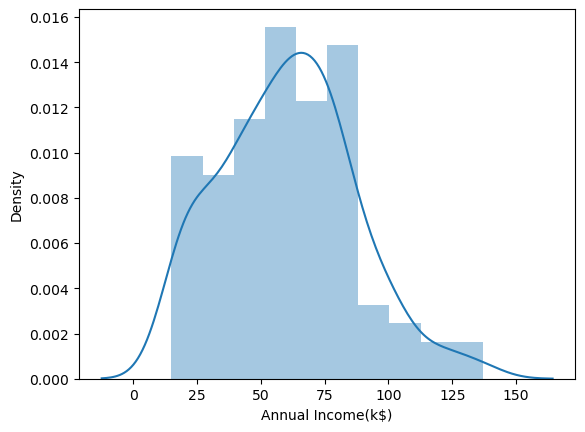

In [10]:
sns.distplot(df["Annual Income(k$)"]);

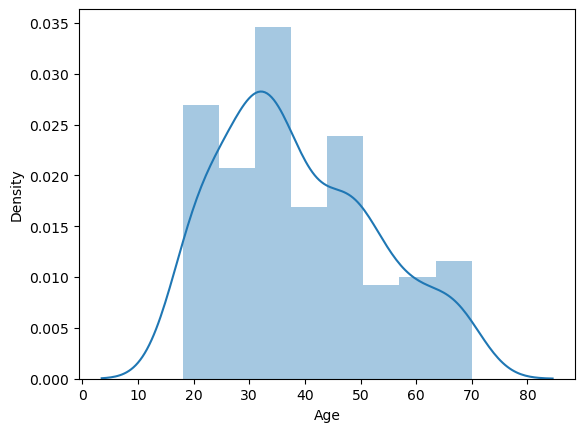

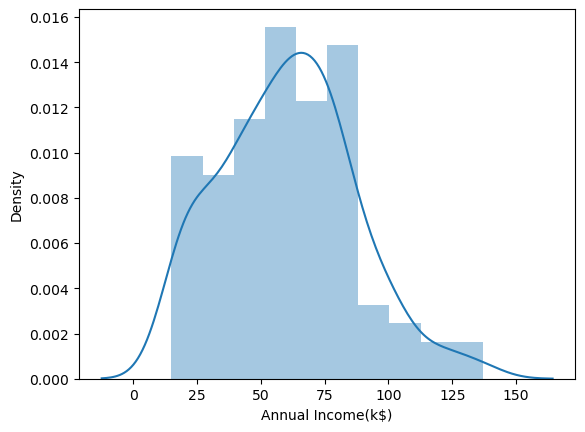

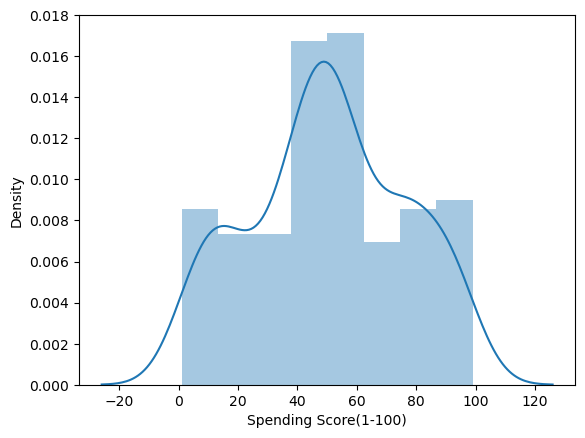

In [11]:
columns = ['Age','Annual Income(k$)','Spending Score(1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income(k$)', ylabel='Density'>

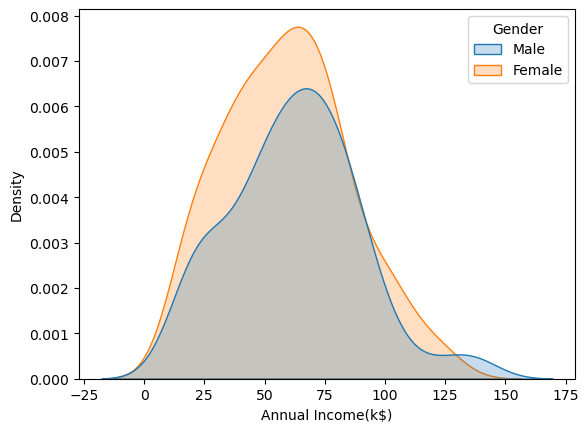

In [12]:
sns.kdeplot(data=df, x="Annual Income(k$)",shade=True, hue="Gender")

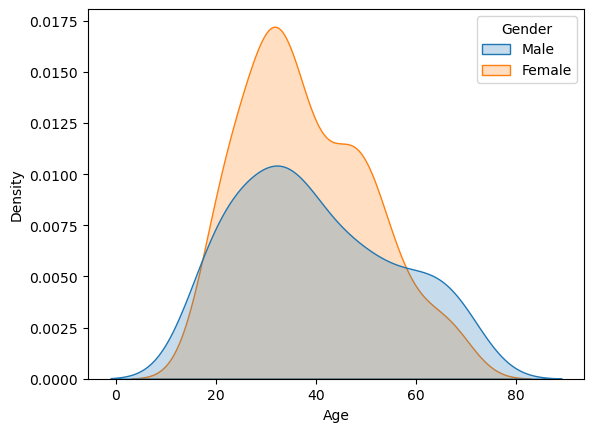

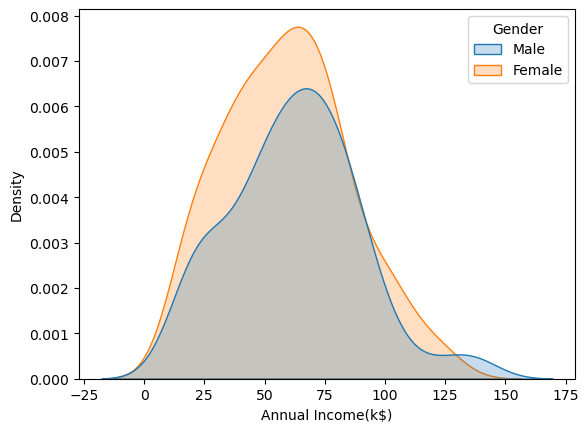

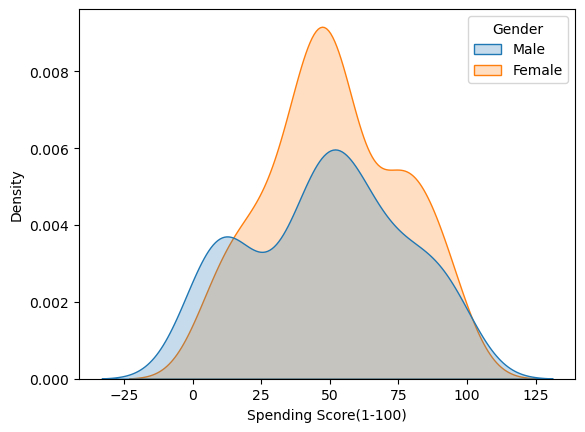

In [13]:
columns = ['Age','Annual Income(k$)','Spending Score(1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df,x=i, shade=True , hue="Gender");

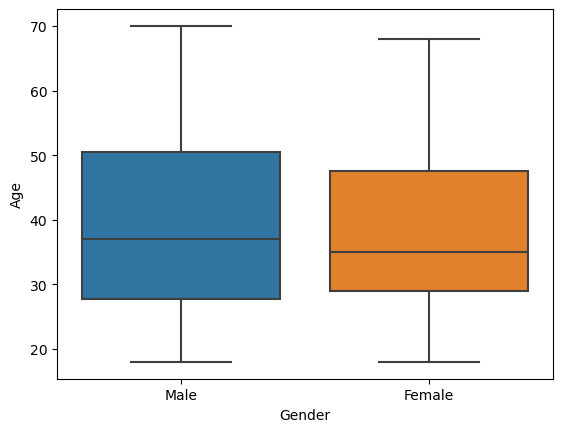

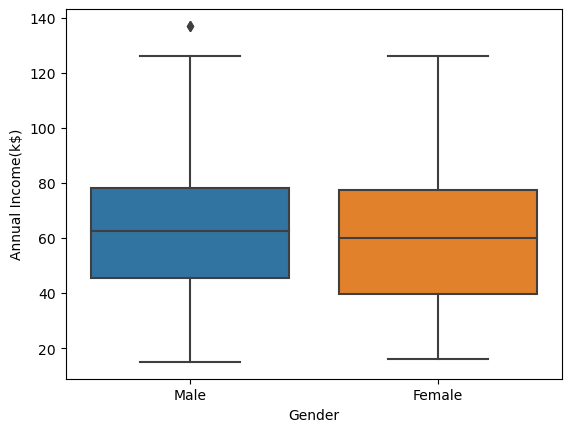

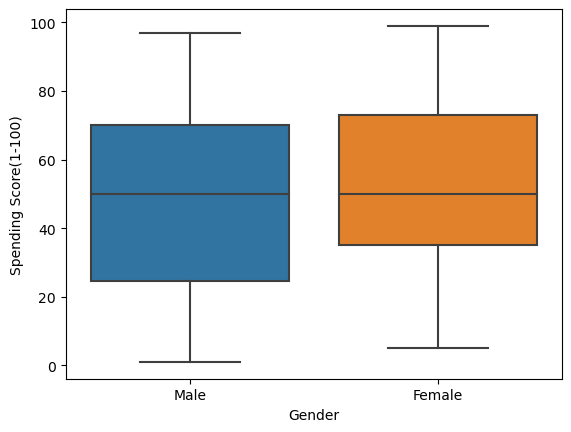

In [14]:
columns = ['Age', 'Annual Income(k$)','Spending Score(1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

# Bivariate analysis


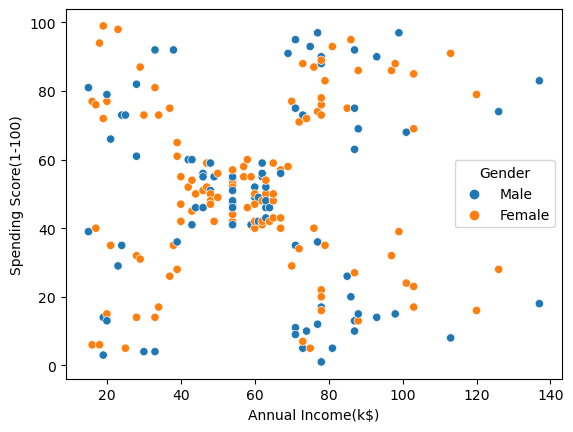

In [15]:
sns.scatterplot(data=df,x="Annual Income(k$)",y="Spending Score(1-100)", hue="Gender");

<Axes: >

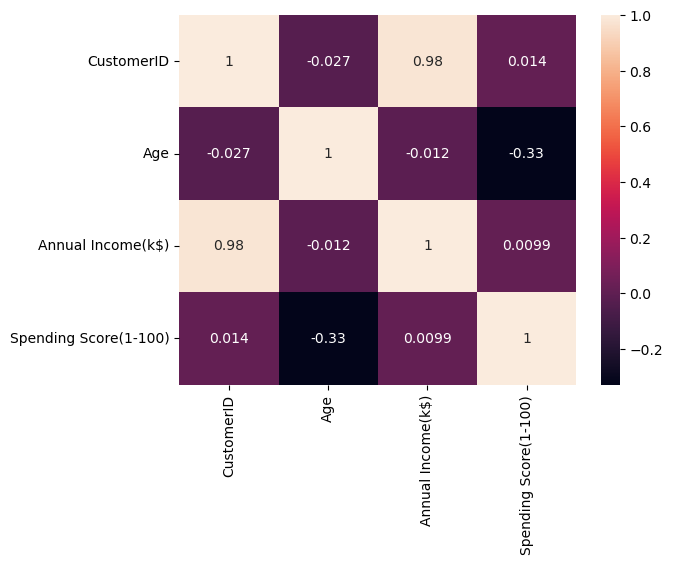

In [16]:
sns.heatmap(df.corr(),annot=True)

# Clustering

In [17]:
clustering = KMeans(n_clusters=5)

In [18]:
clustering.fit(df[['Annual Income(k$)','Spending Score(1-100)']])

KMeans(n_clusters=5)

In [19]:
df['Spending&Income Cluster'] = clustering.labels_
df.head()

,CustomerID,Gender,Age,Annual Income(k$),Spending Score(1-100),Spending&Income Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [20]:
clustering.inertia_

44448.45544793371

In [21]:
intertiascore=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df[['Annual Income(k$)']])
    intertiascore.append(km.inertia_)

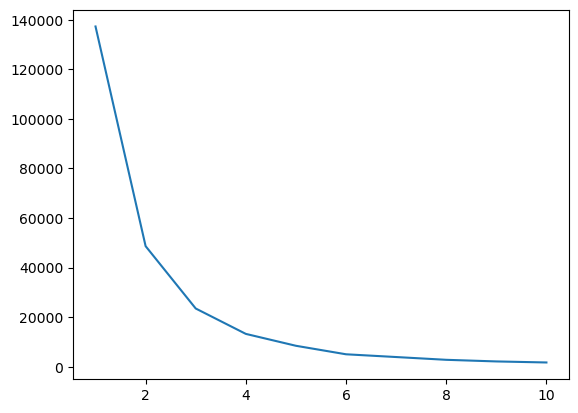

In [22]:
plt.plot(range(1,11),intertiascore)

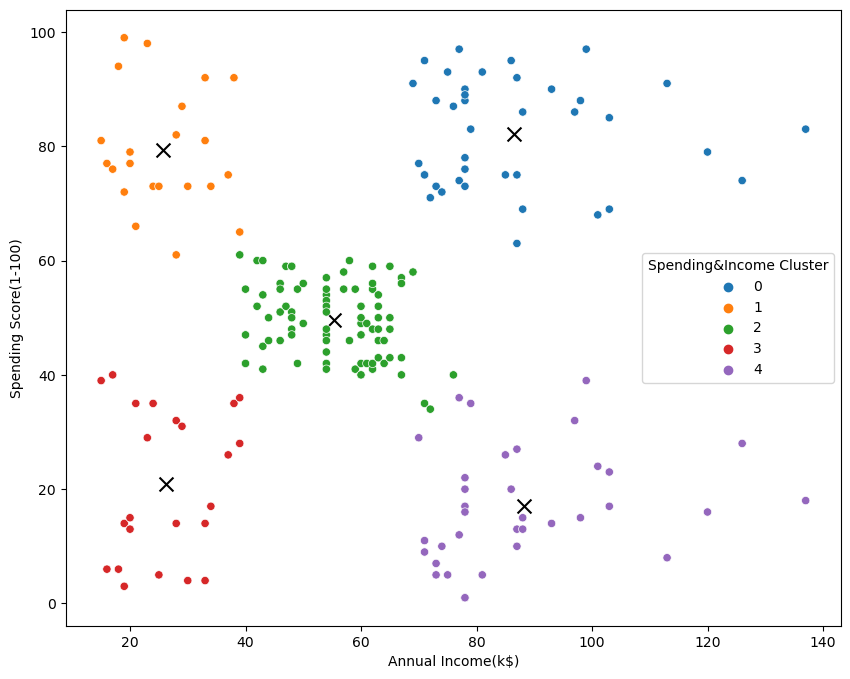

In [23]:
centers = pd.DataFrame(clustering.cluster_centers_)
centers.columns = ['x','y']
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='x')
sns.scatterplot(data=df, x ='Annual Income(k$)',y='Spending Score(1-100)',hue='Spending&Income Cluster',palette='tab10')
plt.savefig('cluster.png')

In [24]:
df.groupby('Spending&Income Cluster')['Age', 'Annual Income(k$)','Spending Score(1-100)'].mean()

,Age,Annual Income(k$),Spending Score(1-100)
Spending&Income Cluster,,,
0,32.692308,86.538462,82.128205
1,25.272727,25.727273,79.363636
2,42.716049,55.296296,49.518519
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


In [25]:
pd.crosstab(df['Spending&Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending&Income Cluster,,
0,0.538462,0.461538
1,0.590909,0.409091
2,0.592593,0.407407
3,0.608696,0.391304
4,0.457143,0.542857


*Cluster 1 consists of high-income customers with high spending scores, primarily women

*Cluster 0 represents customers with moderate spending scores and incomes

*Cluster 2 exhibits the lowest spending scores and incomes among the identified clusters

In [26]:
df


,CustomerID,Gender,Age,Annual Income(k$),Spending Score(1-100),Spending&Income Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,4
197,198,Male,32,126,74,0
198,199,Male,32,137,18,4


In [27]:
df.to_csv('Cluster.csv')